In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
import glob
mpl.rcParams['font.size'] = 18
#%matplotlib notebook
#import matplotlib as mpl
import os
import sys
import math
from datetime import datetime
import time
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import seaborn as sb
import scipy
from scipy.optimize import curve_fit
#import sympy as sp
#from labellines import labelLine, labelLines
#from matplotlib.lines import Line2D

from scipy.optimize import curve_fit, leastsq
#import matplotlib.patches as patches

In [2]:
def read_file_real(fname):
    columns = "Region Material GeV/pr W Err".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', skiprows=13,comment='#')
    
    return df

In [3]:
df_ed_chan_tacw = read_file_real('chan_TACW0/Region.dat')[:-2]
df_ed_amorphous_tacw = read_file_real('amorph_TACW0/Region.dat')[:-2]

df_ed_chan_tcsm = read_file_real('chan_TCSM/Region.dat')[:-2]
df_ed_amorphous_tcsm = read_file_real('amorph_TCSM/Region.dat')[:-2]

regs = ['BLM_AIR', 'BLM_FF', 'BLM_HH', 'BLM_EL', 'BLM51659', 'BLMvert']

N_c_tacw = 10636000+(8049362-113*2) #run_*/lss5-double_exp001_flka_coord.dat + run_*/fluka_*/flka_coord.dat
N_a_tacw = 41100000

N_a_tcsm = 27020000
N_c_tcsm = 3911400+(3148449-262*2)

In [4]:
#TACW
df_ed_chan_tacw.loc[df_ed_chan_tacw['Region'].isin(regs)];
BLM_c_tacw = df_ed_chan_tacw.loc[df_ed_chan_tacw['Region']=='BLMvert']
#BLM_c_tacw['W']*=N_c_tacw
df_ed_amorphous_tacw.loc[df_ed_amorphous_tacw['Region'].isin(regs)];
BLM_a_tacw = df_ed_amorphous_tacw.loc[df_ed_amorphous_tacw['Region']=='BLMvert']
#BLM_a_tacw['W']*=N_a_tacw

#TCSM
df_ed_chan_tcsm.loc[df_ed_chan_tcsm['Region'].isin(regs)];
BLM_c_tcsm = df_ed_chan_tcsm.loc[df_ed_chan_tcsm['Region']=='BLMvert']
#BLM_c_tcsm['W']*=N_c_tcsm
df_ed_amorphous_tcsm.loc[df_ed_amorphous_tcsm['Region'].isin(regs)];
BLM_a_tcsm = df_ed_amorphous_tcsm.loc[df_ed_amorphous_tcsm['Region']=='BLMvert']
#BLM_a_tcsm['W']*=N_a_tcsm

In [5]:
RF_tacw = BLM_a_tacw['W'].values/BLM_c_tacw['W'].values
RF_tcsm = BLM_a_tcsm['W'].values/BLM_c_tcsm['W'].values

#Error propagation:    A/C     Err = sqrt[((1/C)*E_A)**2 + ((-A/C**2)*E_C)**2]
E_A_tacw = BLM_a_tacw['Err'].values*BLM_a_tacw['W'].values*0.01
E_C_tacw = BLM_c_tacw['Err'].values*BLM_c_tacw['W'].values*0.01
A_tacw = BLM_a_tacw['W'].values
C_tacw = BLM_c_tacw['W'].values

E_A_tcsm = BLM_a_tcsm['Err'].values*BLM_a_tcsm['W'].values*0.01
E_C_tcsm = BLM_c_tcsm['Err'].values*BLM_c_tcsm['W'].values*0.01
A_tcsm = BLM_a_tcsm['W'].values
C_tcsm = BLM_c_tcsm['W'].values

Err_tacw = np.sqrt( (E_A_tacw/C_tacw)**2 + (-A_tacw*E_C_tacw/C_tacw**2)**2  )
Err_tcsm = np.sqrt( (E_A_tcsm/C_tcsm)**2 + (-A_tcsm*E_C_tcsm/C_tcsm**2)**2  )

Err_tacw,Err_tcsm

(array([1.16797110e-01, 3.69362108e-01, 1.31852525e-04, 6.17099436e-03,
        4.52295586e-03, 6.62310546e-03, 1.10871132e-01, 2.30829198e-01]),
 array([1.83793193e-01, 3.92677272e-01, 5.35354262e-01, 3.15131133e-05,
        3.30353658e-05, 6.06192952e-05, 6.91439196e-04, 4.54830409e-03]))

TACW0 in, BLM errors:
 [1.16797110e-01 3.69362108e-01 1.31852525e-04 6.17099436e-03
 4.52295586e-03 6.62310546e-03 1.10871132e-01 2.30829198e-01]

TCSM in, BLM errors:
 [1.83793193e-01 3.92677272e-01 5.35354262e-01 3.15131133e-05
 3.30353658e-05 6.06192952e-05 6.91439196e-04 4.54830409e-03]

TACW Amorphous, primaries:  41100000
TACW Channeling, primaries: 10636000 ( Including terminated runs: 18685136 )
TCSM Amorphous, primaries:  27020000
TCSM Channeling, primaries: 4669700 ( Including terminated runs: 7059325 )


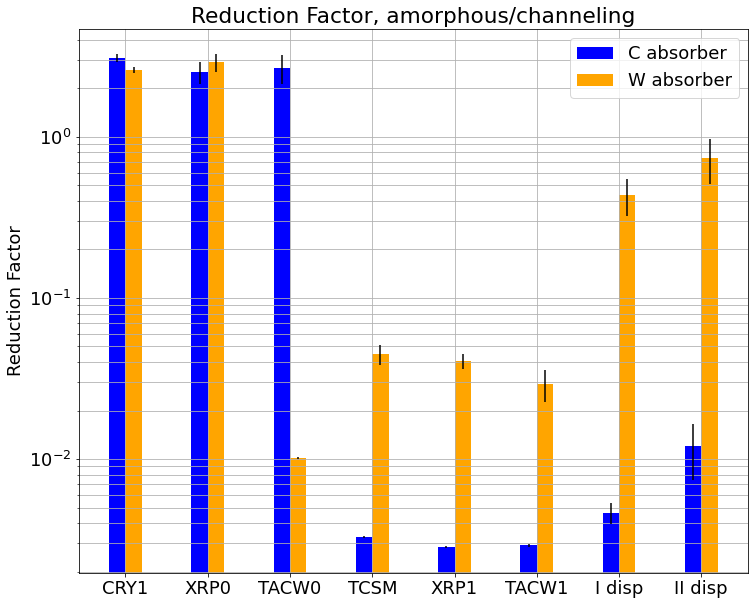

In [6]:
ax,fig = plt.subplots(figsize=(12,10))
#plt.plot(['CRY1','XRP0','TACW0','TCSM','XRP1','TACW1','Disp I','Disp II'],Err,'k+',ms=20);

plt.bar(['CRY1','XRP0','TACW0','TCSM','XRP1','TACW1','I disp','II disp'],RF_tcsm,width=-0.2,color='blue',align='edge',yerr=Err_tcsm,label='C absorber')
plt.bar(['CRY1','XRP0','TACW0','TCSM','XRP1','TACW1','I disp','II disp'],RF_tacw,width=0.2,color='orange',align='edge',yerr=Err_tacw,label='W absorber')

#plt.errorbar(['CRY1','XRP0','TACW0','TCSM','XRP1','TACW1','Disp I','Disp II'],RF_tacw,yerr=Err_tacw,fmt='none',ecolor='k',barsabove=True)
#plt.errorbar(['CRY1','XRP0','TACW0','TCSM','XRP1','TACW1','Disp I','Disp II'],RF_tcsm,yerr=Err_tcsm,fmt='none',ecolor='k',barsabove=True)


plt.yscale('log')
plt.title('Reduction Factor, amorphous/channeling')
plt.ylabel('Reduction Factor');
plt.grid(which='both')
plt.legend()
print('TACW0 in, BLM errors:\n',Err_tacw)
print('\nTCSM in, BLM errors:\n',Err_tcsm)

print('\nTACW Amorphous, primaries: ',N_a_tacw)
print('TACW Channeling, primaries:',10636000, '( Including terminated runs:',N_c_tacw,')')
print('TCSM Amorphous, primaries: ',N_a_tcsm)
print('TCSM Channeling, primaries:',4669700, '( Including terminated runs:',N_c_tcsm,')')

In [7]:
print('TACW Amorphous, primaries:',N_a_tacw)
BLM_a_tacw

TACW Amorphous, primaries: 41100000


,Region,Material,GeV/pr,W,Err
84,BLMvert,BLM.NITR,8.765000e-08,8.765000e-08,1.142
191,BLMvert,BLM.NITR,1.148000e-08,1.148000e-08,3.728
227,BLMvert,BLM.NITR,1.478000e-07,1.478000e-07,1.279
425,BLMvert,BLM.NITR,6.709000e-10,6.709000e-10,12.560
451,BLMvert,BLM.NITR,4.072000e-10,4.072000e-10,7.143
467,BLMvert,BLM.NITR,4.841000e-10,4.841000e-10,10.070
777,BLMvert,BLM.NITR,9.378000e-10,9.378000e-10,14.910
1117,BLMvert,BLM.NITR,3.634000e-10,3.634000e-10,16.240


In [8]:
print('TACW Channeling, primaries:',N_c_tacw)
BLM_c_tacw

TACW Channeling, primaries: 18685136


,Region,Material,GeV/pr,W,Err
84,BLMvert,BLM.NITR,3.362000e-08,3.362000e-08,4.3320
191,BLMvert,BLM.NITR,3.956000e-09,3.956000e-09,12.1700
227,BLMvert,BLM.NITR,1.453000e-05,1.453000e-05,0.2106
425,BLMvert,BLM.NITR,1.499000e-08,1.499000e-08,5.6880
451,BLMvert,BLM.NITR,1.004000e-08,1.004000e-08,8.5640
467,BLMvert,BLM.NITR,1.655000e-08,1.655000e-08,20.2800
777,BLMvert,BLM.NITR,2.164000e-09,2.164000e-09,20.7900
1117,BLMvert,BLM.NITR,4.928000e-10,4.928000e-10,26.7600


In [9]:
print('TCSM Amorphous, primaries:',N_a_tcsm)
BLM_a_tcsm

TCSM Amorphous, primaries: 27020000


,Region,Material,GeV/pr,W,Err
84,BLMvert,BLM.NITR,8.935000e-08,8.935000e-08,1.4870
191,BLMvert,BLM.NITR,1.116000e-08,1.116000e-08,5.5260
227,BLMvert,BLM.NITR,2.198000e-08,2.198000e-08,4.6750
425,BLMvert,BLM.NITR,1.465000e-07,1.465000e-07,0.9487
451,BLMvert,BLM.NITR,4.863000e-08,4.863000e-08,1.1530
467,BLMvert,BLM.NITR,2.110000e-08,2.110000e-08,2.0600
777,BLMvert,BLM.NITR,1.411000e-09,1.411000e-09,14.8100
1117,BLMvert,BLM.NITR,1.988000e-10,1.988000e-10,37.3300


In [10]:
print('TCSM Channeling, primaries:',N_c_tcsm)
BLM_c_tcsm

TCSM Channeling, primaries: 7059325


,Region,Material,GeV/pr,W,Err
85,BLMvert,BLM.NITR,2.900000e-08,2.900000e-08,5.7770
192,BLMvert,BLM.NITR,4.426000e-09,4.426000e-09,14.5600
228,BLMvert,BLM.NITR,8.217000e-09,8.217000e-09,19.4600
427,BLMvert,BLM.NITR,4.458000e-05,4.458000e-05,0.1398
453,BLMvert,BLM.NITR,1.716000e-05,1.716000e-05,0.1717
469,BLMvert,BLM.NITR,7.249000e-06,7.249000e-06,0.3060
779,BLMvert,BLM.NITR,3.048000e-07,3.048000e-07,1.9380
1119,BLMvert,BLM.NITR,1.660000e-08,1.660000e-08,6.9900


In [11]:
print(BLM_a_tacw['Err'].values) 
print(BLM_c_tacw['Err'].values)
print(BLM_a_tcsm['Err'].values) 
print(BLM_c_tcsm['Err'].values)

[ 1.142  3.728  1.279 12.56   7.143 10.07  14.91  16.24 ]
[ 4.332  12.17    0.2106  5.688   8.564  20.28   20.79   26.76  ]
[ 1.487   5.526   4.675   0.9487  1.153   2.06   14.81   37.33  ]
[ 5.777  14.56   19.46    0.1398  0.1717  0.306   1.938   6.99  ]
